# Principal Components Analysis

Objective is to predict the quality of the wine.

In [43]:
import math
import pandas as pd
import numpy as np

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

# Do not use normal form (scietific notation) when printing numbers, exponents can make it harder to compare values
pd.set_option('float_format', '{:f}'.format)

Populating the interactive namespace from numpy and matplotlib


C:\Users\StuartHallows\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Import

Download from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [44]:
wine_data = pd.read_csv("../datasets/UCI/winequality-white.csv", sep=";", engine="python")

## Explore

In [45]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


In [46]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [47]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [48]:
wine_data["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

If we were to randomly guess the quality score for a wine, our accuracy qould be 1/7 - or about 14%

How does reducing the number of features affect accuracy?  
Dimensionality reduction only works if features are correlated with each other. A heatmap allows us to visualise this.

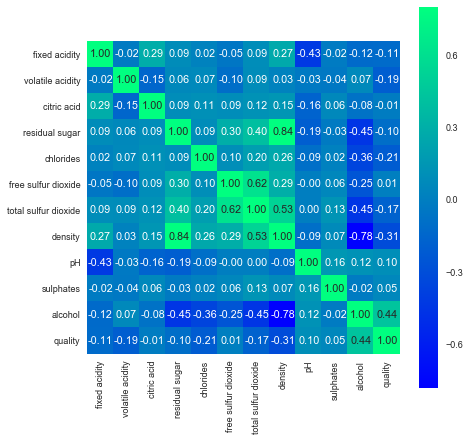

In [49]:
import seaborn as sns

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap="winter")
plt.show()

Some fields are highly correlated, hence there is potential for dimensionality reduction

## Prepare

All features are numeric, none are categorical, and there are no missing values. So no data preparation is needed, although in general data [should be standardised](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) for PCA.

In [50]:
X = wine_data.drop("quality", axis=1)
Y = wine_data["quality"]

X = preprocessing.scale(X)

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Train

Perform classification using all features in the input dataset

In [9]:
from sklearn.svm import LinearSVC

clf_svc = LinearSVC(penalty="l1", dual=False, tol=1e-3)
clf_svc.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)

Perform predictions on the test data and check the baseline score

In [10]:
accuracy = clf_svc.score(x_test, y_test)
print(accuracy)

0.49183673469387756


In PCA only the X is used, it's an unsupervised learning technique

In [11]:
principal_component_count=9

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=principal_component_count, whiten=True)
X_reduced = pca.fit_transform(X)

Examine the magnitue of variation captured by each of the principal components

In [13]:
pca.explained_variance_

array([3.2229119 , 1.57556161, 1.22192081, 1.01873034, 0.97353334,
       0.93893321, 0.7267464 , 0.59948087, 0.41422824])

As absolute numbers are not so useful look at the ratios  
Some dimensioans play a large role in defining the data while others do not

In [14]:
pca.explained_variance_ratio_

array([0.29293217, 0.14320363, 0.11106103, 0.09259294, 0.08848496,
       0.08534014, 0.06605437, 0.05448713, 0.03764942])

When performing PCA one needs to decide how many dimensions to keep to capture most of the information in the data.  
Plot the variance as a Scree plot in order to understand this.

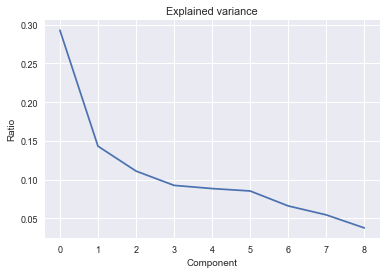

In [19]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Component")
plt.ylabel("Ratio")
plt.title("Explained variance")
plt.show()

Show the cumulative variance

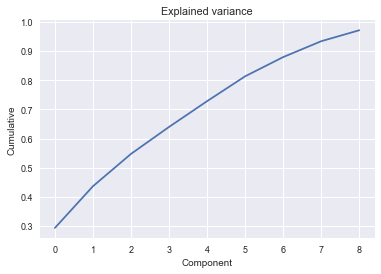

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component')
plt.ylabel('Cumulative');
plt.title("Explained variance")
plt.show()

Most of the varniance can be explained with three dimensions  
Use the principal components of the training data to perform classification using an SVM

In [16]:
X_train, x_test, Y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=0)

clf_svc_pca = LinearSVC(penalty="l1", dual=False, tol=1e-3)
clf_svc_pca.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)

In [17]:
accuracy_pca = clf_svc_pca.score(x_test, y_test)
"Principal components: {} => score: {:f}".format(principal_component_count, accuracy_pca)

'Principal components: 9 => score: 0.493878'

With *11* principal components the accuracy is _0.4918_, this is all the principal components  
With *09* principal components the accuracy is _0.4939_, slightly improved  
With *06* principal components the accuracy is _0.4571_  
With *03* principal components the accuracy is _0.4469_  
With *01* principal components the accuracy is _0.4408_  